# Who survives in the titatic

This is my solution for the Titanic competition form [Kaggle](https://www.kaggle.com/c/titanic), all the input files are extracted from the mentioned link. I won't upload the datasets to this repository.

I assume there is a 'titanic' folder at the same level of this notebook containing the datasets.

In [73]:
import pandas as pd
import numpy as np

train = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/test.csv")

In [74]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


According to Kaggle's competition web page, the data dictionary is as follows:

| Variable      | Definition    | Key        |
| ------------- |:-------------:| ----------:|
| survival      | Survival      | 0 = No, 1 = Yes |
| pclass        | Ticket class  | 1 = 1st, 1 = 2nd, 3 = 3rd |
| sex           | Sex           |            |
| Age           | Age in years           |            |
| sibsp         | # of siblings / spouses aboard the Titanic           |            |
| parch         | # of parents / children aboard the Titanic           |            |
| ticket        | Ticket number           |            |
| fare          | Passenger fare           |            |
| cabin         | Cabin number           |            |
| embarked      | Port of Embarkation           | C=Cherbourg, Q=Queenstown, S=Southampton           |

We are supposed to predict the survival, i.e. 'survived', this is our class. This is naturally a binary classification problem.

Now, let's observe how the variables behave.

## Data exploration & transformation

**Notes:**
* Notice we have 891 samples, but not all of them are complete, notice age seems to have some values missing.
* Also, we have some string categorical fields, we should convert them.
* Other string fields might tell us something, we should inspect them to know if we should discard them or not.

# Sex
First, we observe genere is a string, let's convert it into binary categories.

In [72]:
# Convert Sex to binary categories
train.replace({'Sex': {'male': 1, 'female': 0}}).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


### The Cabin
It seems not all values for Cabin are informed, let's see how these distribute.

In [5]:
train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [6]:
na_cabin = train["Cabin"].isna().sum()
passengers = train["PassengerId"].count()
cabins = train["Cabin"].count()

print("Proportion of NA cabins vs total passengers {:.2f}".format(na_cabin / passengers))
print("Total of different cabins, including NA {}".format(cabins))

Proportion of NA cabins vs total passengers 0.77
Total of different cabins, including NA 204


We have way too many NA cabins, 77% of the dataset does not have the cabin informed, and we have 203 different cabins, let's see how the cabin field distribute towards the target class.

We might want to convert this field in a binary class, either has cabin or not.

In [7]:
cabin_survive = train.copy()
cabin_survive.Cabin = cabin_survive.Cabin.apply(lambda x: 1 if type(x) is str else 0)
cabin_survive.Cabin.value_counts()

0    687
1    204
Name: Cabin, dtype: int64

Now, let's plot this to have a visual perspective on the data.

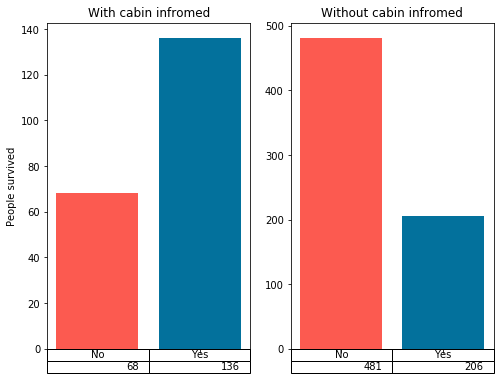

In [69]:
import matplotlib.pyplot as plt

w_cabin = cabin_survive[cabin_survive.Cabin == 1]
wo_cabin = cabin_survive[cabin_survive.Cabin == 0]
w_cabin_counts = w_cabin.Survived.value_counts(sort=False)
wo_cabin_counts = wo_cabin.Survived.value_counts(sort=False)

plt.figure(figsize=(8, 6))
plt.subplot(121)
ax = plt.bar([0, 1], w_cabin_counts, color=["xkcd:coral", 'xkcd:ocean blue'], tick_label=["", ""])
plt.ylabel("People survived")
plt.title("With cabin infromed")
plt.table(cellText=w_cabin_counts.to_numpy().reshape(1, 2), colLabels=["No", "Yes"])

plt.subplot(122)
plt.bar([0, 1], wo_cabin_counts, color=["xkcd:coral", 'xkcd:ocean blue'], tick_label=["", ""])
plt.table(cellText=wo_cabin_counts.to_numpy().reshape(1, 2), colLabels=["No", "Yes"])
plt.title("Without cabin infromed")

plt.show()

For those who has the cabin informed, 33% of the passengers didn't survived, while without cabin, 70% didn't survided.

One last lookup on those with cabin.

In [9]:
w_cabin_s = train[["PassengerId", "Cabin", "Survived"]].join(
    w_cabin[["PassengerId", "Cabin"]], how="inner", rsuffix="_informed"
)

w_cabin_s.head()

,PassengerId,Cabin,Survived,PassengerId_informed,Cabin_informed
1,2,C85,1,2,1
3,4,C123,1,4,1
6,7,E46,0,7,1
10,11,G6,1,11,1
11,12,C103,1,12,1


In [10]:
survived = w_cabin_s[w_cabin_s.Survived == 1]
survived.Cabin = survived.Cabin.apply(lambda x: x[0])
print("Survivors Cabin Letters")
survived.Cabin.value_counts()

Survivors Cabin Letters


/Users/ferro/anaconda3/envs/Deeplearning/lib/python3.6/site-packages/pandas/core/generic.py:5086: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


B    35
C    35
D    25
E    24
F     8
A     7
G     2
Name: Cabin, dtype: int64

In [11]:
survived = w_cabin_s[w_cabin_s.Survived == 0]
survived.Cabin = survived.Cabin.apply(lambda x: x[0])
print("Deceased Cabin Letters")
survived.Cabin.value_counts()

Deceased Cabin Letters


/Users/ferro/anaconda3/envs/Deeplearning/lib/python3.6/site-packages/pandas/core/generic.py:5086: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


C    24
B    12
D     8
A     8
E     8
F     5
G     2
T     1
Name: Cabin, dtype: int64

We can observe presence of all types of cabins (thinking in A, B, C, and D) those in cabins B, C, D, and E had higher survival rate but probably this is due to higher decks had less cabins. This field doesn't seem very promising for survival prediction. According to [Titanica](https://www.encyclopedia-titanica.org/cabins.html) The letters represented the deck the cabin is located but not the class, which is another filed in the data set.

So the conclusion is that this field don't contribute very much in the survival prediction of the passenger, however we will include only the deck letter and leave the 'na' with 'X'.

## Embarked
Now, let's see what happened with this field

In [25]:
em_unique = train.Embarked.unique()
print("Embarked unique values:", em_unique)

Embarked unique values: ['S' 'C' 'Q' nan]


Here we also have 'nan', to have a better glimpsy of the distribution, let's convert this value to a letter.

In [28]:
em_survival = train.copy()
em_survival["Embarked"].fillna('X', inplace=True)
em_survival.Embarked.value_counts()

S    644
C    168
Q     77
X      2
Name: Embarked, dtype: int64

Just two of them, so we can just leave it like this, i.e., replace the nan for a letter, probably convert it to a categorical numeric value.

## Ticket
One could not expect that much from the ticket, but let's take a look just at unique values.

In [35]:
unique_tickets = train.Ticket.unique().shape[0]
tickets = train.Ticket.value_counts()
print("Unique tickets: ", unique_tickets)
print("Total tickets: ", tickets.sum())
tickets

Unique tickets:  681
Total tickets:  891


1601                 7
CA. 2343             7
347082               7
3101295              6
CA 2144              6
347088               6
382652               5
S.O.C. 14879         5
LINE                 4
347077               4
W./C. 6608           4
19950                4
113760               4
349909               4
17421                4
PC 17757             4
2666                 4
113781               4
4133                 4
C.A. 31921           3
C.A. 34651           3
SC/Paris 2123        3
29106                3
371110               3
PC 17760             3
248727               3
PC 17755             3
13502                3
F.C.C. 13529         3
363291               3
                    ..
PC 17610             1
347074               1
STON/O2. 3101282     1
234360               1
2650                 1
A/4. 39886           1
370371               1
370370               1
STON/O 2. 3101286    1
SOTON/OQ 392086      1
A/5 3536             1
12460                1
W/C 14208  

It seems several people used the same ticket number, let's see how the survival rate behaves when more than one person used the same ticket.

In [65]:
ticket_survival = train.copy()
# Let's group by the ticket
groups = ticket_survival.groupby("Ticket")
# Then filter for those who share the same ticket number
share_ticket = groups.filter(lambda x: x.PassengerId.count() > 1)

print("Passengers sharing ticket: ", share_ticket.PassengerId.count())

Passengers sharing ticket:  344


It seems we have a great quantity of passengers sharing a ticket, this represents 38% of the data set. It might be worthy to keep this field .

Let's see the survival rate of these people.

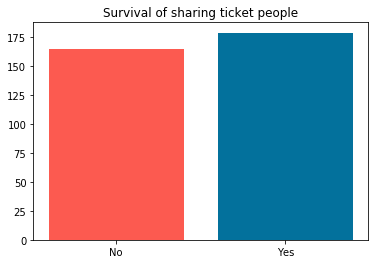

In [70]:
plt.bar([0, 1], 
        share_ticket.Survived.value_counts(sort=False), 
        color=["xkcd:coral", 'xkcd:ocean blue'], 
        tick_label=["No", "Yes"])
plt.title("Survival of sharing ticket people")
plt.show()


Seems pretty much even, let's see what happens with the rest.

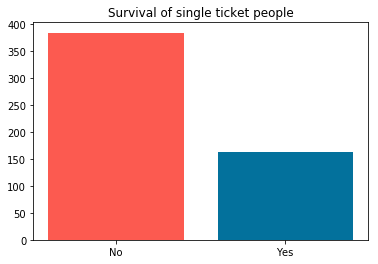

In [71]:
single_ticket = groups.filter(lambda x: x.PassengerId.count() == 1)
plt.bar([0, 1], 
        single_ticket.Survived.value_counts(sort=False), 
        color=["xkcd:coral", 'xkcd:ocean blue'], 
        tick_label=["No", "Yes"])
plt.title("Survival of single ticket people")
plt.show()

This time things don't look so even, so people sharing ticket number might have better possibilities of survival, we should preserve this field, however, it might be better to transformit into a binary category format, i.e., either the passenger share a ticket or not.

# Build the transformation pipeline
Now that we know how what do we need to do to the fields, let's construct a transformation pipeline for this dataset.

In [91]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

lb = LabelEncoder()
np.unique(lb.fit_transform(train.Embarked.fillna('X')))
#train.Embarked.fillna('X').unique()

{}

In [92]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

class DataFrameSelector(BaseEstimator, TransformerMixin):
    """This transformer will accept a pandas dataframe as input,
    and will return the numpy array of features as value"""
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
class AttributeEncoder(BaseEstimator, TransformerMixin):
    """Given the input feature arrays, and if we want to
    binary or multi-category encode, will transorm the """
    def __init__(self, binary=False):
        self.binary = binary
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        le = None
        if self.binary:
            le = LabelBinarizer()
        else:
            le = LabelEncoder()
        return le.fit_transform(X.fillna('X'))
    

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('selector', SimpleImputer)
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])



In [15]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


In [17]:
import matplotlib.pyplot as plt

